<a href="https://colab.research.google.com/github/YunilaPutmasari/Machine_Learning-2024/blob/main/ML_Tugas3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**TUGAS1**

In [2]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

### **1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv**

a. MEMUAT DATA

Tahap ini memuat file CSV yang berisi data suara. Dalam hal ini, Anda menggunakan pandas.read_csv() untuk membaca file voice.csv dan menyimpannya dalam bentuk DataFrame data. DataFrame ini berisi fitur-fitur numerik seperti frekuensi suara, median, skewness, kurtosis, dll., serta kolom target 'label', yang menunjukkan apakah suara tersebut dari laki-laki atau perempuan.

In [3]:
file_path = '/content/drive/MyDrive/Mechine Learning/voice.csv'
data = pd.read_csv(file_path)


b. PEMROSESAN DATA
Pada tahap ini, dilakukan prapemrosesan data:

Pengubahan Label: Kolom 'label' pada dataset berisi nilai berupa string ('female' dan 'male'). Karena model SVM bekerja dengan nilai numerik, Anda perlu mengonversi label tersebut menjadi angka. 'female' diubah menjadi 1 dan 'male' menjadi 0.
Memisahkan Fitur dan Label: Data dipecah menjadi dua bagian:
X berisi semua fitur (tanpa kolom label).
y berisi kolom target 'label' yang akan diprediksi (0 untuk laki-laki dan 1 untuk perempuan).

In [4]:
data['label'] = data['label'].apply(lambda x: 1 if x == 'female' else 0)
X = data.drop('label', axis=1)
y = data['label']


c. Membagi Data Menjadi Set Pelatihan dan Pengujian

Langkah ini memisahkan data menjadi dua bagian: data pelatihan dan data pengujian.

train_test_split: Fungsi ini digunakan untuk membagi data menjadi dua set:
80% data digunakan untuk pelatihan (X_train, y_train).
20% data digunakan untuk pengujian (X_test, y_test).
random_state=42: Menjaga agar hasil pemisahan selalu konsisten setiap kali kode dijalankan.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


d. Normalisasi Fitur

Pada tahap ini, dilakukan normalisasi data. Fitur-fitur pada dataset mungkin memiliki rentang nilai yang sangat berbeda (misalnya, frekuensi suara bisa jauh lebih besar daripada fitur lainnya). Agar SVM bekerja lebih baik, kita perlu menstandarisasi data sehingga semua fitur memiliki rentang nilai yang serupa.

StandardScaler: Mengubah data sehingga memiliki rata-rata 0 dan standar deviasi 1.
fit_transform(X_train): Menyesuaikan scaler dengan data pelatihan, kemudian menerapkan transformasi.
transform(X_test): Menerapkan transformasi yang sama pada data pengujian tanpa menyesuaikan ulang scaler.

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


e. training model SVM

In [7]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

evaluasi model

In [8]:
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9763406940063092
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       337
           1       0.96      0.99      0.98       297

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



## 2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan
##1. Menggunakan data spam.csv
##2.  Fitur CountVectorizer dengan mengaktifkan stop_words
##3.  Evaluasi hasilnya

# **TUGAS 2**

# **Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.**

In [6]:
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [10]:
# Image directories
train_dir = "/content/drive/MyDrive/Mechine Learning/images/training"
test_dir = "/content/drive/MyDrive/Mechine Learning/images/test"

def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if img is not None:
                img_list.append((img, label))

    return img_list

# Load training and test data
train_img = load_dataset(train_dir)
test_img = load_dataset(test_dir)

def standarized_input(image):
    std_img = cv2.resize(image, (1100, 600))
    return std_img

def preprocess(img_list):
    std_img_list = []
    for item in img_list:
        image = item[0]
        label = item[1]
        std_img = standarized_input(image)
        std_img_list.append((std_img, label))

    return std_img_list

train_std_img_list = preprocess(train_img)
test_std_img_list = preprocess(test_img)


In [18]:
def extract_histogram_features(img_list):
    hist_features = []
    labels = []

    for img, label in img_list:
        # Convert image to HSV
        img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        # Calculate histogram for the V channel
        hist = cv2.calcHist([img_hsv], [2], None, [256], [0, 256]).flatten()

        # Normalize histogram
        hist /= hist.sum()  # Normalize to sum to 1

        hist_features.append(hist)
        labels.append(1 if label == 'day' else 0)  # Encode labels

    return np.array(hist_features), np.array(labels)

# Extract histogram features
X_train, y_train = extract_histogram_features(train_std_img_list)
X_test, y_test = extract_histogram_features(test_std_img_list)


In [26]:
# Train SVM model
model = SVC(kernel='rbf')  # RBF kernel is the default
model.fit(X_train, y_train)

# Make predictions
y_test_pred = model.predict(X_test)

# Calculate accuracy
acc_test = accuracy_score(y_test, y_test_pred)


from sklearn.metrics import classification_report
# Generate classification report
print(classification_report(y_test, y_test_pred, target_names=['Night', 'Day']))


              precision    recall  f1-score   support

       Night       0.99      0.96      0.97        80
         Day       0.96      0.99      0.98        80

    accuracy                           0.97       160
   macro avg       0.98      0.98      0.97       160
weighted avg       0.98      0.97      0.97       160



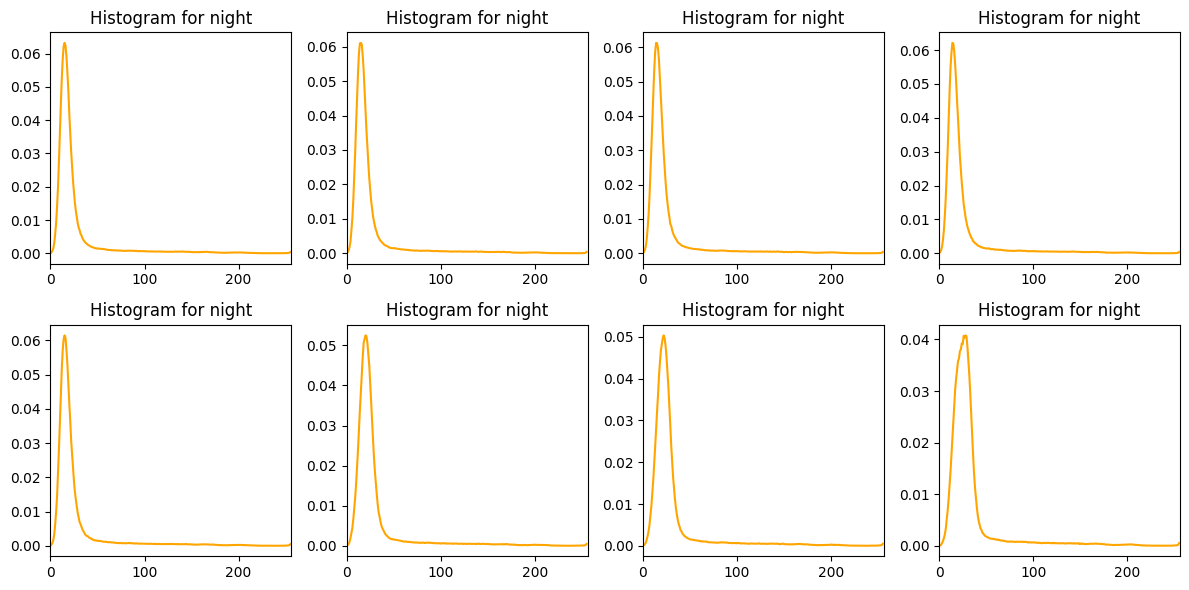

In [21]:
import matplotlib.pyplot as plt
import cv2

def plot_histograms(img_list):
    plt.figure(figsize=(12, 6))

    for i, (img, label) in enumerate(img_list):
        # Convert image to HSV
        img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        # Calculate histogram for the V channel
        hist = cv2.calcHist([img_hsv], [2], None, [256], [0, 256]).flatten()

        # Normalize histogram
        hist /= hist.sum()  # Normalize to sum to 1

        # Plot histogram
        plt.subplot(2, 4, i + 1)
        plt.plot(hist, color='orange')
        plt.title(f'Histogram for {label}')
        plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()

# Plot histograms for a subset of training images
plot_histograms(train_std_img_list[:8])  # Display histograms for the first 8 images
